# Head

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = sns.load_dataset('iris')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
data.shape

(150, 5)

In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

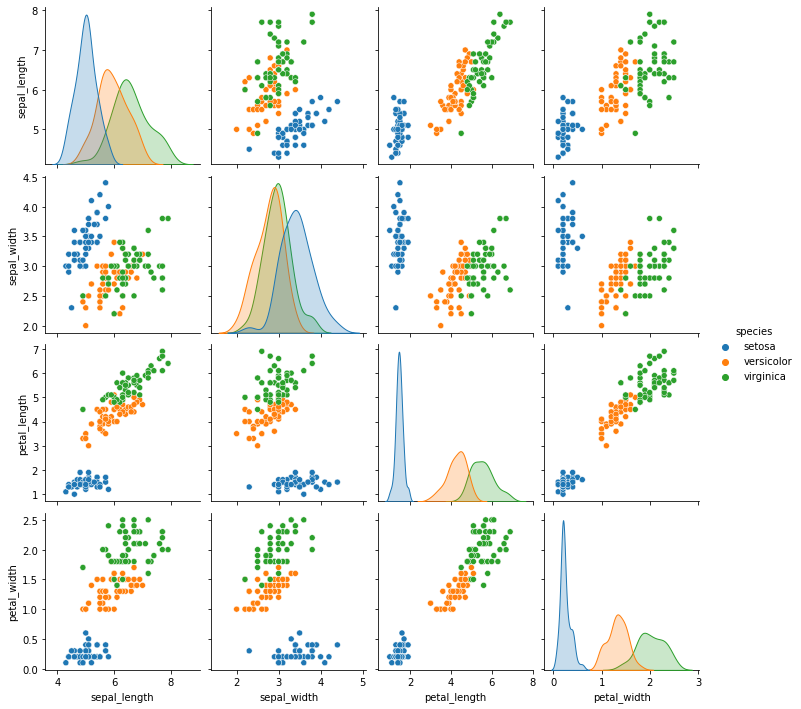

In [ ]:
sns.pairplot(data= data , hue='species')

In [ ]:
data.info()  #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


#Split Data

In [ ]:
#Split data to two set (train , test)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
# reset index for (train, test) sets

train_set.reset_index(inplace=True)
train_set.drop('index' , axis=1 , inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index' , axis=1 , inplace=True)
print('')

In [ ]:
#split train set
x_train = train_set.drop('species' , axis=1).copy()  #predictors
y_train = train_set['species'].copy()      # labels

#split test set
x_test = test_set.drop('species' , axis=1).copy()   #predictors
y_test = test_set['species'].copy()        # labels


In [ ]:
# Encoding train set labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(np.array(y_train).reshape(-1,1))

y_test = label_encoder.transform(y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Select and train model

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = tree_clf.predict(x_train)
print('mean_squared_error : ' , mean_squared_error(y_train , y_pred, squared=False))

mean_squared_error :  0.09128709291752768


In [ ]:
some_instance = x_train.iloc[0 , :]

print('predict : ' ,tree_clf.predict([some_instance]) )
print('label   : ' ,[y_train[0]] )

predict :  [0]
label   :  [0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.925, 0.9  , 0.95 ])

**get prediction of all training set**

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_clf, x_train, y_train, cv=3) # get prediction of all training set

**Confusion Martix on DTC**

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx  

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  6, 33]])

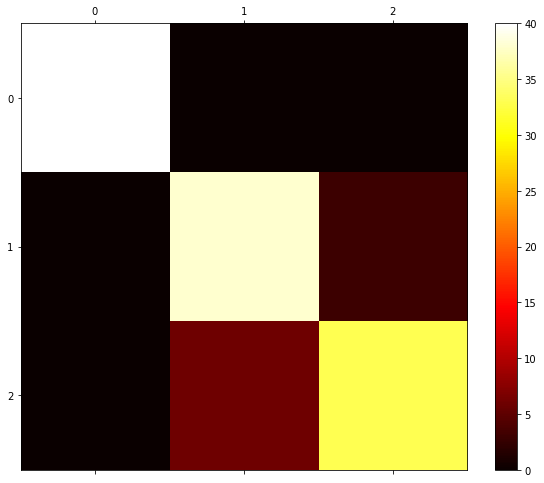

In [ ]:
plt.figure(figsize=(10,8))
plt.matshow(conf_mx, cmap='hot' , fignum=1);
plt.colorbar()

#Test

In [ ]:
test_predict = tree_clf.predict(x_test)

In [ ]:
print('mean_squared_error_on_test_set : ' , mean_squared_error(y_test, test_predict , squared=False))

mean_squared_error_on_test_set :  0.0


In [ ]:
tree_clf.score(x_train , y_train)

0.9916666666666667

In [ ]:
tree_clf.score(x_test , y_test)

1.0

Accurecy (on train set) = 0.9916666666666667

Accurecy (on test set) = 1.0
*** 
The test set is very small

#Plot Decision Tree Classifier

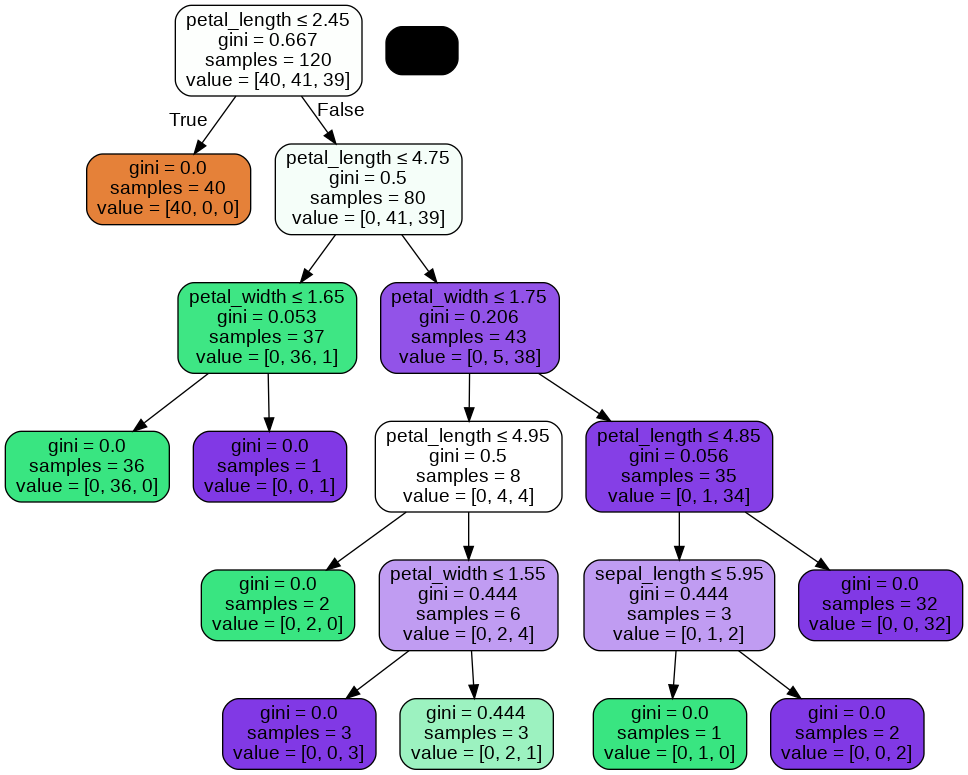

In [61]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=data.columns[:4],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())